0.002 0.0019999999999999996
11.74 12.674600732471433
14.42 17.19631195477592
21.32 24.471714517352897
24.79 27.9790126986299


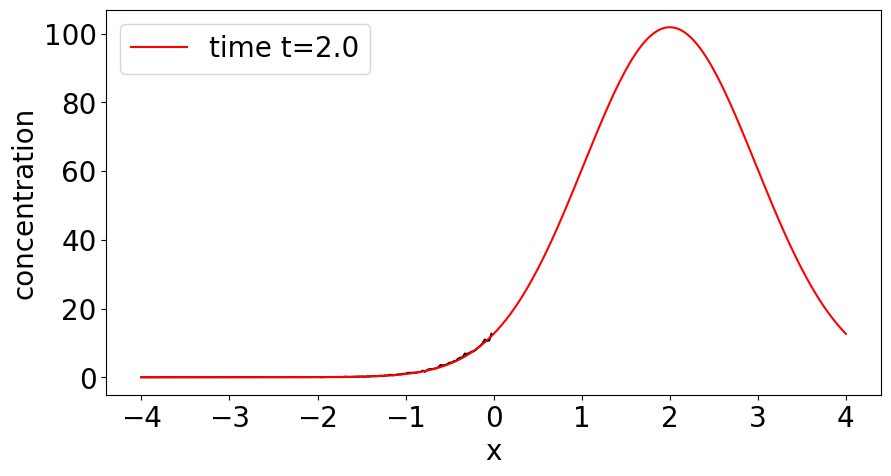

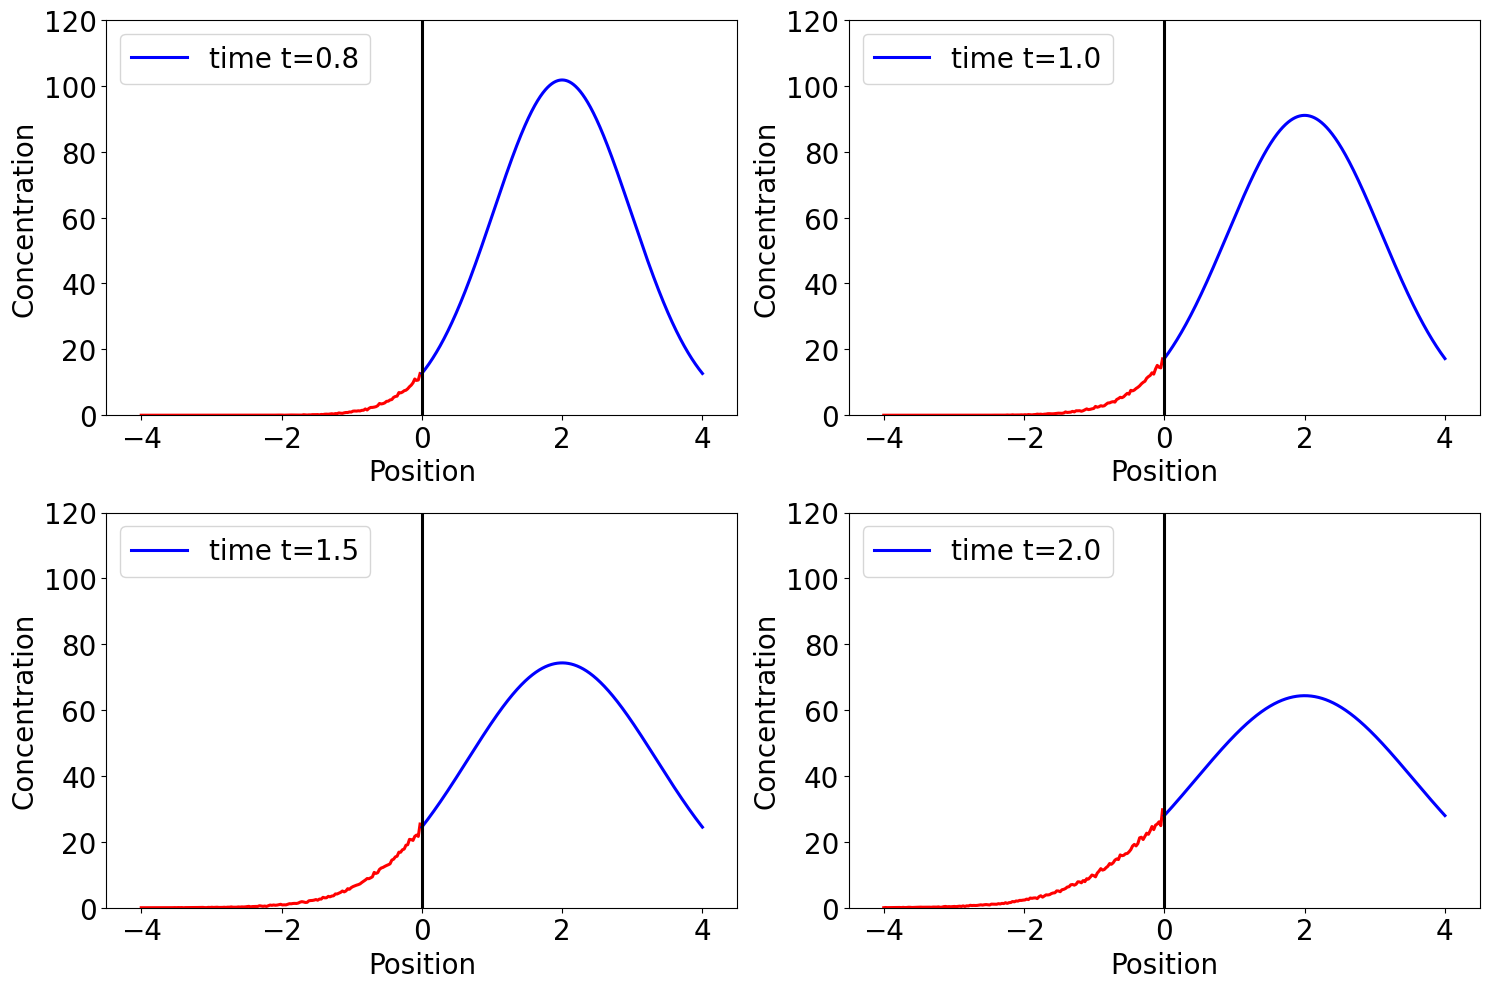

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
c0=250
D=0.6
def c(x,t):
    return c0*(np.exp((-np.abs(x-2)**2)/(4*D*t)))/(4*np.pi*D*t)**0.5

deltat=0.002
# define injection rate
deltax=np.sqrt(deltat*2*D)
#deltax=0.05
x_boundary=0
gamma = D/(deltax**2)

b=4
a=-4

def diffusion(x0,D, deltat): #diffuse a particle from x0 with diffusion coefficient D and time step deltat
    # use Eule-Maruyama

    xt = x0+np.random.normal(0,1)*np.sqrt(2*D*deltat)

    return xt

X=np.linspace(a,b, 100)
timesteps=[0, 0.5,1,1.5]

# plot concentration domain in the range X from timesteps
'''
fig=plt.figure(figsize=(10,10))
for t in timesteps:
    Y=[c(x,t) for x in X]
    plt.plot(X,Y, label='time t='+str(t))
    plt.xlabel('Position', fontsize=14)
    plt.ylabel('Concentration', fontsize=14)
plt.legend()

'''
#%% dynamics in particle domain


# define injection

def injection(x_boundary,time, deltat, gamma):
    # get concentration at boundary rising from x to x+deltax
    if time>0:
        c_boundary=0
        for i in range(11):
            c_boundary=c(x_boundary+i*deltax/10,time)+c_boundary
        c_boundary=c_boundary/11
    else:
        c_boundary=0
    
    new_particles=0
    # convert concentration at boundary to number of particles

    X=c_boundary*deltax
   
    
    for i in range(int(X)):
        if np.random.rand()<1-np.exp(-deltat*gamma):
            new_particles+=1
    
    if np.random.rand()<1-np.exp(-deltat*gamma*(X-int(X))):
        new_particles+=1

   
    return new_particles

# %% define hybrid scheme

def hybrid_scheme(x_boundary, deltax, time_steps, deltat):
    
    # 
    ParticlesTimes=[None]*(time_steps)
    
    Particles=[]
    for t in range(time_steps-1):
        Particles_new=[]

        # inject particles from boundary cell

        new_particles=injection(x_boundary,(t+1)*deltat, deltat/2, gamma)

        # assign uniformly distributed positions to new particles in the boudnary cell
        
        #Particles_new=[x_boundary-np.random.rand()*deltax-0.00001 for i in range(new_particles)]
        Particles_new=[x_boundary-np.random.rand()*deltax for i in range(new_particles)]
       
        # move particles
        
        Particles=Particles+Particles_new

        for i in range(len(Particles)):
            Particles[i]=diffusion(Particles[i], D, deltat)

        # inject particles from boundary cell

        new_particles2=injection(x_boundary,t*deltat, deltat/2, gamma)

        # assign uniformly distributed positions to new particles in the boudnary cell
        Particles_new=[x_boundary-np.random.rand()*deltax for i in range(new_particles)]
        
        Particles=Particles_new+Particles

        # remove particles that are outside the domain

        Particles=[p for p in Particles if -np.inf<=p<=x_boundary]
        
        # save
        
        ParticlesTimes[t+1]=Particles.copy()

    return ParticlesTimes

#%%
def translate(Particles, discr):
    
    number_of_particles=np.zeros(int((x_boundary-a)/discr))
    concetration_particles=np.zeros(int((x_boundary-a)/discr))
    for i in range(int((x_boundary-a)/discr)):
        # count number of particles in cell i at time t
    
        
        number_of_particles[i]=len([p for p in Particles if a+(i)*discr<=p<=a+(i+1)*discr])

    
    # update concentration at time t
    
    concetration_particles=number_of_particles/discr 
    
    return concetration_particles
#%%

time_steps=1000
T=time_steps*deltat
sim=4000
time_plot=time_steps
print(deltat, deltax**2/(2*D) )

discr=0.025
concentration_particles=np.zeros(( int((x_boundary-a)/discr), 4))
concentration_particles_not_average=np.zeros(( int((x_boundary-a)/discr), 4))

TimesPlot=[399,499, 749, 999]
for s in range(sim):
    Particles=hybrid_scheme(x_boundary, deltax, time_steps, deltat)
    
   
    concetration_particles_s_1=translate(Particles[TimesPlot[0]], discr)
    concetration_particles_s_2=translate(Particles[TimesPlot[1]], discr)
    concetration_particles_s_3=translate(Particles[TimesPlot[2]], discr)
    concetration_particles_s_4=translate(Particles[TimesPlot[3]], discr)
    

    concentration_particles[:,0]=concentration_particles[:,0]+concetration_particles_s_1
    concentration_particles[:,1]=concentration_particles[:,1]+concetration_particles_s_2
    concentration_particles[:,2]=concentration_particles[:,2]+concetration_particles_s_3
    concentration_particles[:,3]=concentration_particles[:,3]+concetration_particles_s_4
    
    concentration_particles_not_average[:,0]=concetration_particles_s_1
    concentration_particles_not_average[:,1]=concetration_particles_s_2
    concentration_particles_not_average[:,2]=concetration_particles_s_3
    concentration_particles_not_average[:,3]=concetration_particles_s_4
    


concentration_particles=concentration_particles/sim


#%% plot concentration_particles
t1=TimesPlot[0]*deltat
colors=['blue', 'red','green']
Xp=np.linspace(a,x_boundary, int((x_boundary-a)/discr))


fig=plt.figure(figsize=(10,5))
plt.plot(Xp[0:-1],concentration_particles[0:-1, 0],  color='black')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Concentration', fontsize=14)
#Ycb=[c(x,t1) for x in np.linspace(a,x_boundary-discr, 1000)]
#plt.plot(np.linspace(a,x_boundary-discr, 1000),Ycb,'--', color='red')
Yc=[c(x,t1) for x in np.linspace(a,b, 1000)]
plt.plot(np.linspace( a, b,1000),Yc, label='time t='+str(T), color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('concentration',fontsize=20)
plt.legend(fontsize=20)


#%%


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    #ax.plot(Xp[0:-1], concentration_particles_not_average[0:-1, i], color='orange')
    ax.plot(Xp[0:-1], concentration_particles[0:-1, i], color='red', linewidth=2.2)
    
    
    ax.set_xlabel('Position', fontsize=20)
    ax.set_ylabel('Concentration', fontsize=20)
    ax.set_ylim(0,120)
    ax.set_xlim(-4.5,4.5)
    #Yc = [c(x, (TimesPlot[i]+1) * deltat) for x in np.linspace(x_boundary-deltax, b, 1000)]
    Yc = [c(x, (TimesPlot[i]+1) * deltat) for x in np.linspace(x_boundary, b, 1000)]
    ax.plot(np.linspace(x_boundary, b, 1000), Yc, label=f'time t={np.round((TimesPlot[i]+1) * deltat, decimals=2)}', linewidth=2.2, color='blue')
    ax.axvline(0, color='black', linewidth=2.2)  # Add vertical line at x = 0
    ax.tick_params(axis='both', labelsize=20)  # Set font size for both x and y ticks
    ax.legend(fontsize=20, loc='upper left', bbox_to_anchor=(0, 1))
    print(concentration_particles[-1, i],Yc[0])
plt.tight_layout()
plt.savefig('Coupling1D.png')

In [5]:
print(deltax, len(concentration_particles))

0.04898979485566356 160
